This Notebook is an adaptation from a [notebook](https://github.com/cltl/ma-hlt-labs/blob/master/lab3.machine_learning/Lab3.5.ml.emotion-detection-bow.ipynb) generated by Piek Vossen.

Our daily decisions are strongly influenced by our emotions. These strong feelings are a crucial element in the human experience of our daily lives. When something makes us happy, we often repeat it, but when something makes us feel anger or sadness, we avoid it [(García, 2019)](https://www.meaningcloud.com/blog/emotion-recognition). We can identify the emotions by extracting subjective information from textual sources like reviews, recommendations, posts on social media, transcribed conversations, etc. This can be done with the help of Natural Language Processing (NLP) tools. NLP uses computational linguistic techniques to help machines understand and generate human languages in the form of texts or speech.

## **What is Emotion Detection?**
*The following image was sourced from this [blog](https://medium.com/neuronio/from-sentiment-analysis-to-emotion-recognition-a-nlp-story-bcc9d6ff61ae)*

With the help of Natural Language Processing and Machine Learning we can observe emotional behaviors associated with an individual from a text. Through textual data we can identify small behavioral subsets through textual indicators or verbal signals that can represent the overall emotion. The primary goal of this task is to analyze and understand the state of an author. Emotion Detection can be considered the broader concept of sentiment analysis. It is a more complex procedure that identifies the broader spectrum of human emotions, for example, with this analysis we can identify emotions such as: happiness, fear, anger, etc. While sentiment analysis focuses on analyzing and characterizing a text in terms of polarity (positive-negative-neutral). 
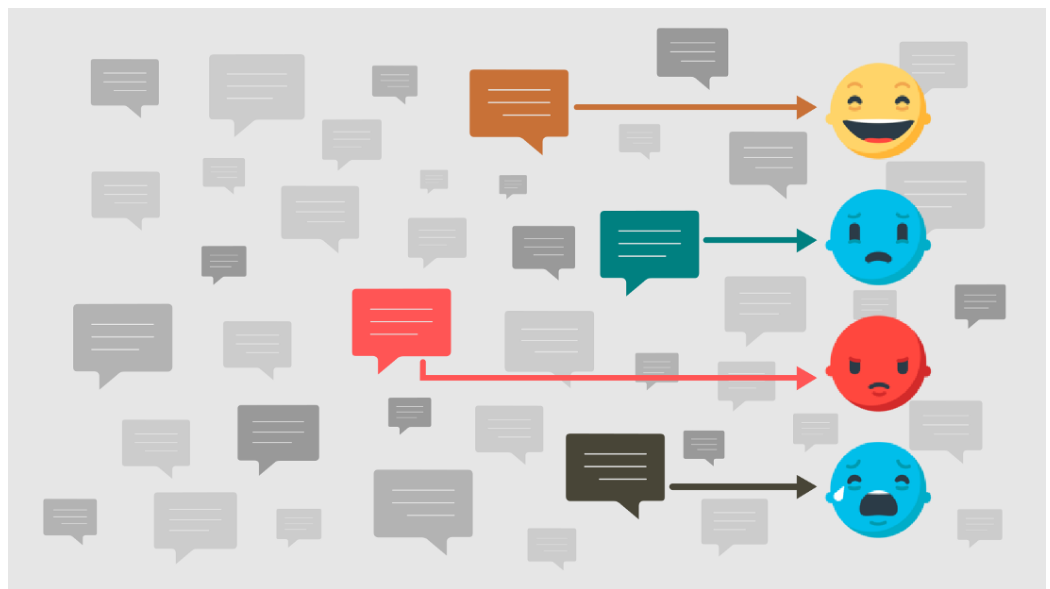




### **How does Emotion Detection work?**

#### **Brief History Moment**

Textual data can contain several associated emotions and there are multiple approaches to analyzing a text in terms of emotion. The first approach of detecting emotional states was introduced as ‘affective computing’ in 1997 by Since Picard. This concept proposed the role of emotions in human computer interaction [(Shivhare and Khethawat, 2012)](https://www.researchgate.net/publication/225045375_Emotion_Detection_from_Text).

#### **Approaches**
There are multiple approaches to analyzing a text in terms of emotion. If you would like to have a better overview on how you can implement an emotion detection task, then a paper written [by Canales and Martinez-Bacco, 2014](https://aclanthology.org/W14-6905.pdf) is the way to go. For this task the techniques can be divided into lexicon based and machine learning based.Some of these methods are the following:


* **Keyword spotting:** This is a simple lexicon-based technique where specific keywords within the data are associated with an emotional state. Let's imagine that we have the sentence “The dog at the park looked scary”, in this case we can see that the keyword ‘scary’ can give us a hint on the emotional state, which is ‘fear’.  These keywords are classified into emotion labels and texts are classified per emotion based on the keywords within the text.

* **Machine Learning Based:** With the use of a pre-trained emotion classifier model, we can easily implement an emotion detection task. Machine Learning approaches apply algorithms based on the linguistic features of the data in order to learn and detect emotions on labelled training data.

* **Hybrid approach:** Both of the previous methods can be combined to generate a hybrid approach. 


# **Implementation**
For this notebook we are going to be implementing a machine learning based approach. We are using a pre-trained classifier model, Support Vector Machine (SVM).



> ### **Support Vector Machines (SVMs)** 
An SVM is a type of large-margin classifier whose objective is to establish a decision border between two classes that is as far away from any point in the training data as possible. It uses a function called kernel to map the space of data points in which the data is not linearly separable [(Mullen and Collier, 2004)](https://aclanthology.org/W04-3253/).

*If you would like to have a better understanding of this classifier a great explanation is provided by [Burges 1998](https://www-ai.cs.tu-dortmund.de/LEHRE/VORLESUNGEN/KDD/SS08/burges_svm_tutorial.pdf)*.




### **Step 0: Loading the the data and relevant packages**

The first step in order to start with the emotion detection task is to load the desired data as well as the relevant packages for pre-processing steps. The data used for this notebook is an open-source dataset from [Hugging face](https://huggingface.co/datasets/emotion). This dataset contains English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise.

*If this is the first time using datasets the following line is necessary.*

In [4]:
#pip install datasets

In [5]:
#Importing all relevant packages
import pandas as pd
import sklearn
import numpy
import nltk
from sklearn import svm
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from datasets import load_dataset
from datasets.dataset_dict import DatasetDict

In [7]:
dataset = load_dataset("emotion")

### **Step 1: Reviewing and preparing the data**

Text data is unstructured, and we need to process the data to obtain structured representations if we want to extract meainingful information. The common idea of all NLP tools is that they try to transform text in some meaningful way. The given data is already splitted to three components: train,test, and validation. The following steps are preparing the data for the task.

**1.1 Seperating the data**

The following step seperates the data into three different variables: train, test and validation. For training our classifier we are only using the train_data. 

In [8]:
train_data = dataset['train']
test_data = dataset['test']
validation_data = dataset['validation']

In [ ]:
#Checking the size of the data
print(len(train_data))
print(len(test_data))
print(len(validation_data))

16000
2000
2000


**1.2 Dataframe**

A DataFrame is a two dimensional data structure of a table with rows and columns. With the creation of a DataFrame makes the inspection and understanding of the data easier. Moreover, this function can take on a lot of different structures as input.The package used to generate a dataframe is [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). This procedure is done for both train and test data.

In [ ]:
# Create dataframe objects 
dftrain = pd.DataFrame(train_data)
dftrain.rename(columns = {'label':'emotion'}, inplace = True) #renaming the name of a column 
dftest = pd.DataFrame(test_data)
dftest.rename(columns = {'label':'emotion'}, inplace = True)  #renaming the name of a column

**1.3 Adjusting Labels**

The emotion labels provided from the original datasets are numeric values. For example number '0' represents the emotion 'sadness'. For a better understanding of the data we are changing the emotion labels from numeric to strings, from '0' to the keyword 'sadness'. This procedure is done for both train and test data.

In [ ]:
#converting the number of emotion to a string label 
sadness = dftrain['emotion'].replace(0,'sadness')
joy = sadness.replace(1,'joy')
love = joy.replace(2,'love')
anger = love.replace(3,'anger')
fear = anger.replace(4,'fear')
all_emotions = fear.replace(5,'surprise')
dftrain['emotion'] = all_emotions

In [ ]:
#converting the number of emotion to a string label 
sadness_test = dftest['emotion'].replace(0,'sadness')
joy_test = sadness.replace(1,'joy')
love_test = joy.replace(2,'love')
anger_test = love.replace(3,'anger')
fear_test = anger.replace(4,'fear')
all_emotions_test = fear.replace(5,'surprise')
dftest['emotion'] = all_emotions_test

**1.4 Statistics of the data**

By reviewing the data used for our task we have a better understanding of the dataset as well as the labels used. The following cell provides some information concerning the data we are using.

In [ ]:
dftrain.emotion.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

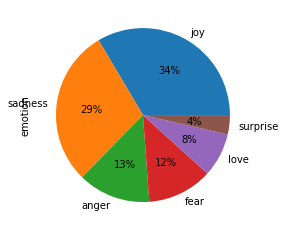

In [ ]:
dftrain.emotion.value_counts().plot(kind='pie', autopct='%1.0f%%')

# **Step 2: Input preparation**

**2.1 Instances**

The following step creates a list of labels and instances in order to train the classifier for both the train and test data.

In [ ]:
training_instances=[]
training_labels = []
for text in dftrain['text']:
    training_instances.append(text)
for label in dftrain['emotion']:
  training_labels.append(label)

In [ ]:
test_labels = []
test_instances = []
for label in dftest['emotion']:
    test_labels.append(label)
for utterance in dftest['text']:
    test_instances.append(utterance)

**2.2 Converting the text to numerical values**

This step creates a dictionary generating a vector with the length of the number for all unique tokenized words. It will convert the list of text to bag-of-words vector representation. 

> **Bag-of-words(BOW):** This approach counts how often each word appears in each cluster, assigning the frequency of each word in each cluster.





In [ ]:
frequency_threshold = 5
utterance_vec =CountVectorizer(min_df=frequency_threshold,tokenizer=nltk.word_tokenize) 

In [ ]:
#nltk.download('punkt')
training_count_vectors = utterance_vec.fit_transform(training_instances)

>**What does TF-IDF stand for?**

This abbreviation stands for: term frequency-inverse document frequency.

> **What is the funtion of this formula?**

This formula concerns measuring the representation of the importance of a word to a document. 

In [ ]:
tfidf_transformer = TfidfTransformer()
training_tfidf_vectors = tfidf_transformer.fit_transform(training_count_vectors)

In [ ]:
test_count_vectors = utterance_vec.transform(test_instances)
test_tfidf_vectors = tfidf_transformer.fit_transform(test_count_vectors)

# **Step 3: Training the model**


In [ ]:
#training - any other classifier can be used
svm_linear_clf = svm.LinearSVC(max_iter=2000)

svm_linear_clf.fit(training_tfidf_vectors, training_labels)

LinearSVC(max_iter=2000)

In [ ]:
# Predicting the Test set results
y_pred_svm = svm_linear_clf.predict(test_tfidf_vectors)

# **Step 4: Results - Evaluation**


The evaluation of the classifier is done with the following ways:
> **Precision:** quality of a positive prediction made by the model.

> **Recall:** the ratio between the number of positive samples correctly classified as positive to the total number of positive samples.   

> **F-score:** evaluating a binary classification model based on the predictions made for the positive class.   

> **Confusion Matrix:** determines the performance of classification models for a given set of test data.








In [ ]:
macro_precision= sklearn.metrics.precision_score(y_true=test_labels,
                             y_pred=y_pred_svm, average='macro') #you can change to micro or weighted for the average parameter
print('precision', macro_precision)

precision 0.15076916045207134


In [ ]:
macro_recall= sklearn.metrics.recall_score(y_true=test_labels,
                             y_pred=y_pred_svm,
                             average='macro') #you can change to micro or weighted for the average parameter

print('recall', macro_recall)

recall 0.15299482657340593


In [ ]:
macro_f_score= sklearn.metrics.f1_score(y_true=test_labels,
                             y_pred=y_pred_svm,
                             average='macro')
print('f_score', macro_f_score)

f_score 0.15173520105330066


In [ ]:
report = classification_report(test_labels,y_pred_svm,digits = 7)
print(report)

              precision    recall  f1-score   support

       anger  0.1066176 0.1082090 0.1074074       268
        fear  0.1137441 0.1016949 0.1073826       236
         joy  0.3628809 0.3732194 0.3679775       702
        love  0.0516129 0.0462428 0.0487805       173
     sadness  0.2697595 0.2886029 0.2788632       544
    surprise  0.0000000 0.0000000 0.0000000        77

    accuracy                      0.2400000      2000
   macro avg  0.1507692 0.1529948 0.1517352      2000
weighted avg  0.2329188 0.2400000 0.2362942      2000



In [ ]:
cf_matrix_svm = sklearn.metrics.confusion_matrix(test_labels,y_pred_svm)

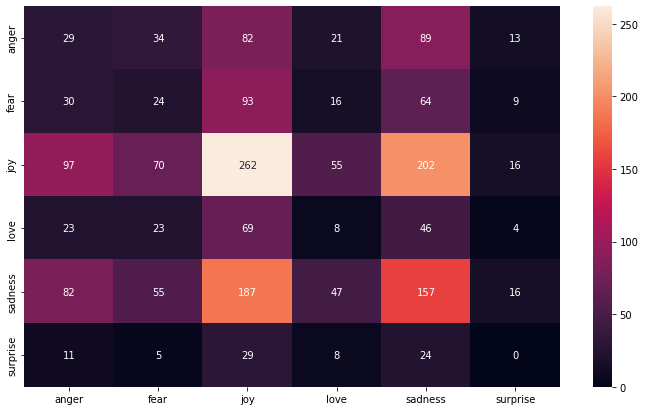

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = cf_matrix_svm
df_cm = pd.DataFrame(array, index = [i for i in svm_linear_clf.classes_], columns =[i for i in svm_linear_clf.classes_])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True, fmt='g')

### **Discussion**

If we take a closer look to the results it can be seen that the label that was picked up the most by the classifier was 'joy' as it was 262 times identified correctly. While in the case of 'sadness' it can be seen that it was wrongly assigned as 'joy' 202 times. This is an interesting case as these two emotions are completly opposites. Another interesting result, worth mentioning is the case of 'surprise' as it was never identified correctly as 'surprise'.

If you are still unsure if your classifier is working, you can always test the  performance on a different/unknown data. 

## **Closing Notes**

This notebook was aiming to introduce an emotion detection task and  highlight the importance of identifying emotions through textual data. By extracting this subjective information from textual source we can identify the emotions represented by the author's text and respond appropriately. This task can be beneficial in many field such as education, politics, customer experience and employee satifsfaction. With this blog we show the value of an NLP task such as emotion detection.